In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import chisquare
from sklearn.feature_selection import RFE
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, 
                             recall_score, precision_score)
from sklearn.calibration import calibration_curve
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

C:\Users\DIU\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dataset = pd.read_csv("IBM Employee Attrition.csv")

In [3]:
dataset.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   
2          ...                                  2            80   
3          ...                                  3            80   
4          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [4]:
dataset.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

__For the sake of visualization Data Post-Processing__

In [5]:
# Education
dataset.loc[dataset["Education"] == 1, "Education"] = "Below College"
dataset.loc[dataset["Education"] == 2, "Education"] = "College"
dataset.loc[dataset["Education"] == 3, "Education"] = "Bachelor"
dataset.loc[dataset["Education"] == 4, "Education"] = "Master"
dataset.loc[dataset["Education"] == 5, "Education"] = "Doctor"

# Environment Satisfaction
dataset.loc[dataset["EnvironmentSatisfaction"] == 1, "EnvironmentSatisfaction"] = "Low"
dataset.loc[dataset["EnvironmentSatisfaction"] == 2, "EnvironmentSatisfaction"] = "Medium"
dataset.loc[dataset["EnvironmentSatisfaction"] == 3, "EnvironmentSatisfaction"] = "High"
dataset.loc[dataset["EnvironmentSatisfaction"] == 4, "EnvironmentSatisfaction"] = "Very High"

# JobInvolvement
dataset.loc[dataset["JobInvolvement"] == 1, "JobInvolvement"] = "Low"
dataset.loc[dataset["JobInvolvement"] == 2, "JobInvolvement"] = "Medium"
dataset.loc[dataset["JobInvolvement"] == 3, "JobInvolvement"] = "High"
dataset.loc[dataset["JobInvolvement"] == 4, "JobInvolvement"] = "Very High"

# JobSatisfaction
dataset.loc[dataset["JobSatisfaction"] == 1, "JobSatisfaction"] = "Low"
dataset.loc[dataset["JobSatisfaction"] == 2, "JobSatisfaction"] = "Medium"
dataset.loc[dataset["JobSatisfaction"] == 3, "JobSatisfaction"] = "High"
dataset.loc[dataset["JobSatisfaction"] == 4, "JobSatisfaction"] = "Very High"

# PerformanceRating
dataset.loc[dataset["PerformanceRating"] == 1, "PerformanceRating"] = "Low"
dataset.loc[dataset["PerformanceRating"] == 2, "PerformanceRating"] = "Good"
dataset.loc[dataset["PerformanceRating"] == 3, "PerformanceRating"] = "Excellent"
dataset.loc[dataset["PerformanceRating"] == 4, "PerformanceRating"] = "Outstanding"

# RelationshipSatisfaction
dataset.loc[dataset["RelationshipSatisfaction"] == 1, "RelationshipSatisfaction"] = "Low"
dataset.loc[dataset["RelationshipSatisfaction"] == 2, "RelationshipSatisfaction"] = "Medium"
dataset.loc[dataset["RelationshipSatisfaction"] == 3, "RelationshipSatisfaction"] = "High"
dataset.loc[dataset["RelationshipSatisfaction"] == 4, "RelationshipSatisfaction"] = "Very High"

# WorkLifeBalance
dataset.loc[dataset["WorkLifeBalance"] == 1, "WorkLifeBalance"] = "Bad"
dataset.loc[dataset["WorkLifeBalance"] == 2, "WorkLifeBalance"] = "Good"
dataset.loc[dataset["WorkLifeBalance"] == 3, "WorkLifeBalance"] = "Better"
dataset.loc[dataset["WorkLifeBalance"] == 4, "WorkLifeBalance"] = "Best"

In [6]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
dataset.isnull().sum().any()

False

In [8]:
print(dataset["Attrition"].value_counts())

(dataset["Attrition"].value_counts() * 100) / 1470

No     1233
Yes     237
Name: Attrition, dtype: int64


No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

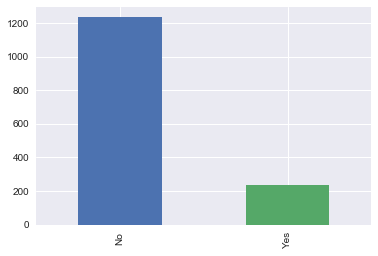

In [9]:
dataset["Attrition"].value_counts().plot.bar()

## Gender Distribution

In [10]:
dataset["Gender"].value_counts() / len(dataset)

Male      0.6
Female    0.4
Name: Gender, dtype: float64

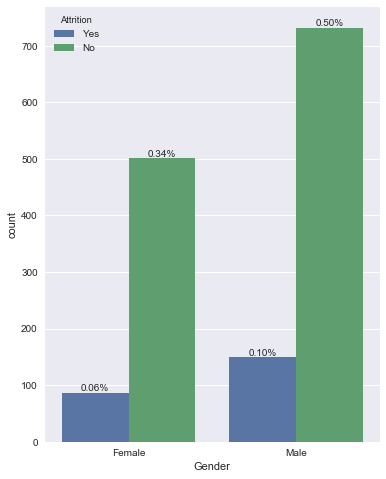

In [11]:
plt.figure(figsize=(6, 8))
ax = sns.countplot(data = dataset, x = "Gender", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x()+p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               ) 

>__`Male` are more often conduct attrition than `Female`__.

## Marital Status Analysis

In [12]:
print(dataset["MaritalStatus"].value_counts(), "\n")
print(round(dataset["MaritalStatus"].value_counts()/1470, 2))

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 

Married     0.46
Single      0.32
Divorced    0.22
Name: MaritalStatus, dtype: float64


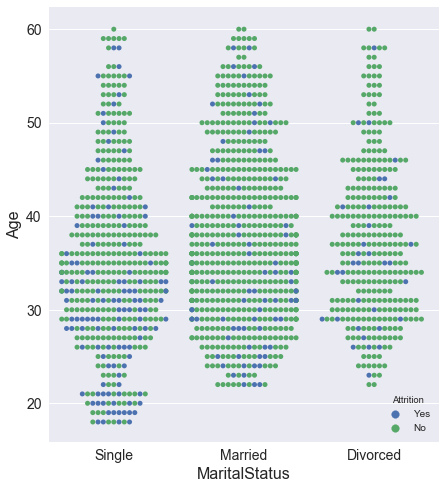

In [13]:
plt.figure(figsize=(7, 8))
sns.swarmplot(x = 'MaritalStatus', y = 'Age', hue="Attrition", data = dataset)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("MaritalStatus", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.show()

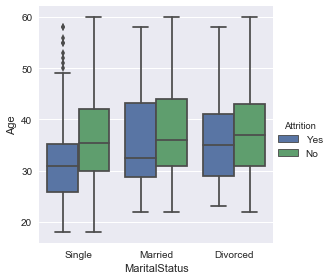

In [14]:
sns.factorplot(x = "MaritalStatus", y = "Age", hue = "Attrition", data = dataset, kind = "box")

Text(0.5,0,'MaritalStatus')

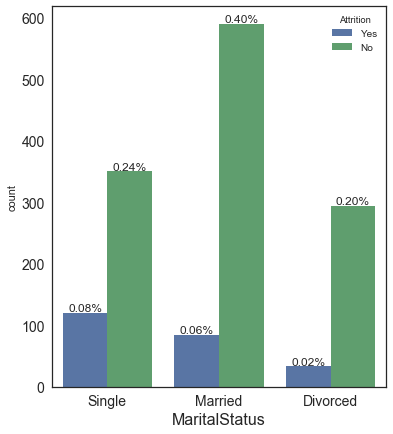

In [15]:
sns.set(style="white")
plt.figure(figsize=(6, 7))
ax = sns.countplot(data = dataset, x = "MaritalStatus", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("MaritalStatus", fontsize=16)


> __`Single` employees are more often conduct attrition than `Married` or `Divorced` Employees__.

## Age Distribution

In [16]:
print("Min Age: ", dataset["Age"].min())
print("Max Age: ", dataset["Age"].max())

Min Age:  18
Max Age:  60


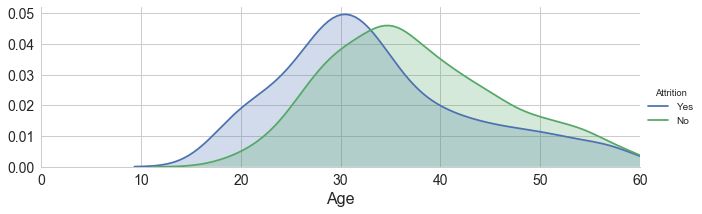

In [17]:
sns.set(style="whitegrid")
facet = sns.FacetGrid(dataset, hue = "Attrition", aspect = 3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, dataset["Age"].max()))
facet.add_legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Age", fontsize=16)
plt.show()

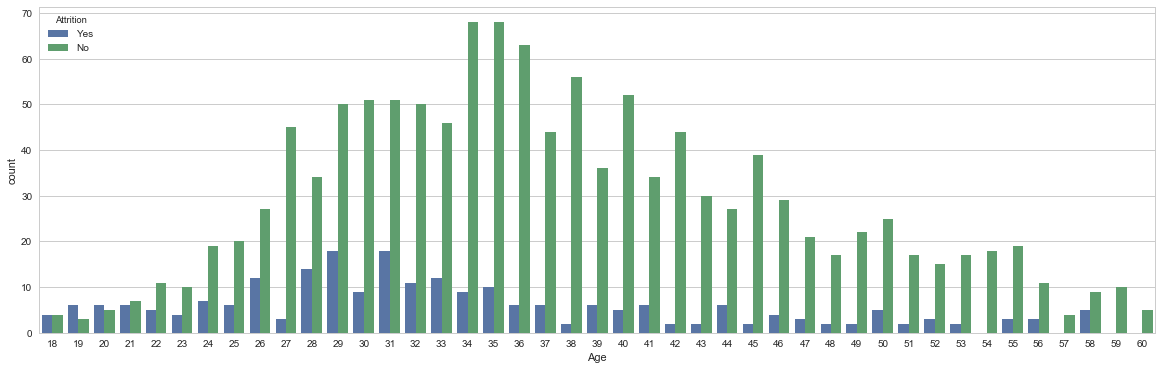

In [18]:
plt.figure(figsize=(20, 6))
sns.countplot(data = dataset, x = "Age", hue = "Attrition")

>__Employees with`Age` between `18` to `40` are most often conduct attrition__.

## DistanceFromHome Analysis

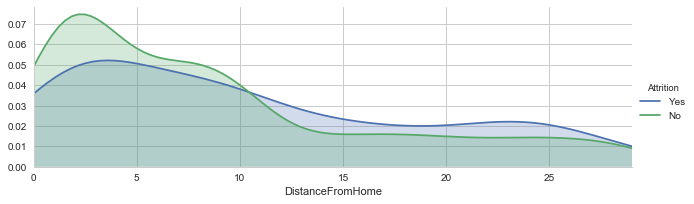

In [19]:
facet = sns.FacetGrid(dataset, hue = "Attrition", aspect = 3)
facet.map(sns.kdeplot,"DistanceFromHome",shade= True)
facet.set(xlim=(0, dataset["DistanceFromHome"].max()))
facet.add_legend()

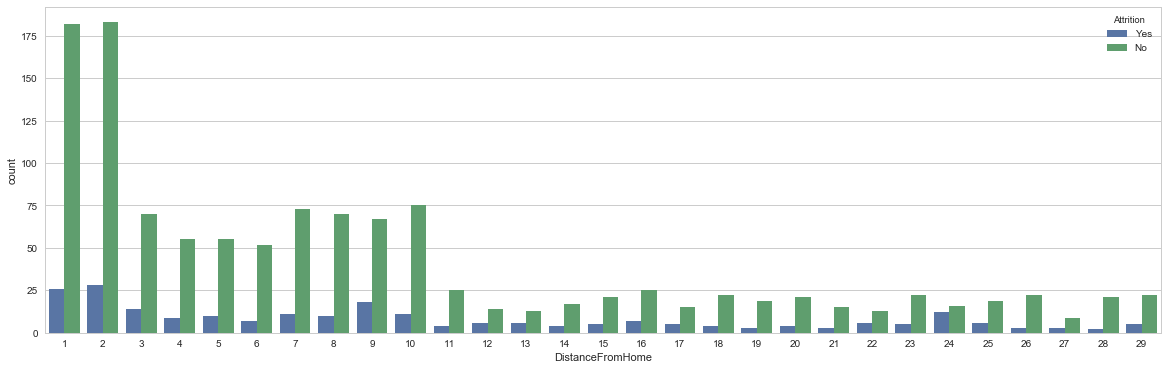

In [20]:
plt.figure(figsize=(20, 6))
sns.countplot(data = dataset, x = "DistanceFromHome", hue = "Attrition")

>__`Short distance` Employees are more often conduct attrition than `Long Distance` Employees__

## Education Analysis

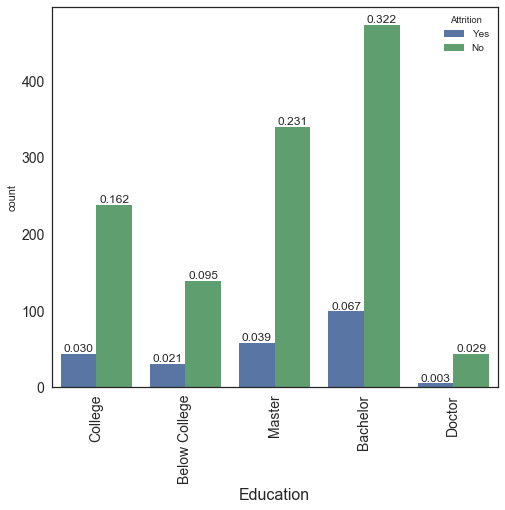

In [21]:
sns.set(style="white")
plt.figure(figsize=(8, 7))
ax = sns.countplot(data = dataset, x = "Education", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.3f}".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Education", fontsize=16)
plt.show()

In [22]:
dataset.Education.value_counts()

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

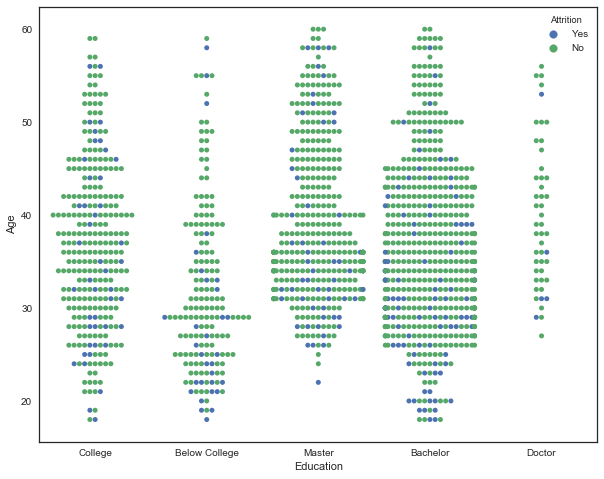

In [23]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x = 'Education', y = 'Age', hue="Attrition", data = dataset)

In [24]:
# Education
dataset.loc[dataset["Education"] == "Below College", "Education"] = 1
dataset.loc[dataset["Education"] == "College", "Education"] = 2
dataset.loc[dataset["Education"] == "Bachelor", "Education"] = 3
dataset.loc[dataset["Education"] == "Master", "Education"] = 4
dataset.loc[dataset["Education"] == "Doctor", "Education"] = 5

In [25]:
print("Total no. of Employee with Doctorate Degree: ", len(dataset[dataset["Education"] == 5]))
print("Doctorate Employees with No Attrition: ", np.array([dataset[dataset["Education"] == 5]["Attrition"]== "No"]).sum())
print("Doctorate Employees with Attrition: ", np.array([dataset[dataset["Education"] == 5]["Attrition"]== "Yes"]).sum())

Total no. of Employee with Doctorate Degree:  48
Doctorate Employees with No Attrition:  43
Doctorate Employees with Attrition:  5


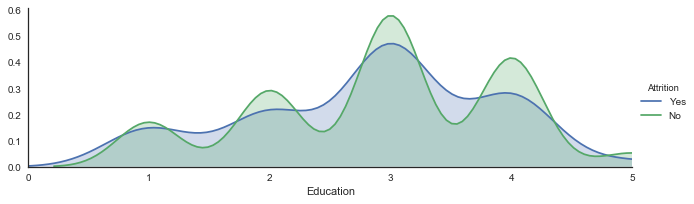

In [26]:
facet = sns.FacetGrid(dataset, hue = "Attrition", aspect = 3)
facet.map(sns.kdeplot,"Education",shade= True)
facet.set(xlim=(0, dataset["Education"].max()))
facet.add_legend()

> __Employees with `lower grade` Education are more often conduct attrition__ 

In [27]:
dataset[dataset["Education"] == 5]["Age"].min()

27

In [28]:
dataset[(dataset["Age"] > 27) & (dataset["Education"]==5) & (dataset["Attrition"] == "Yes")]

Age Attrition     BusinessTravel  DailyRate              Department  \
421    29       Yes      Travel_Rarely        408  Research & Development   
1033   31       Yes  Travel_Frequently       1445  Research & Development   
1111   53       Yes      Travel_Rarely        607  Research & Development   
1236   36       Yes      Travel_Rarely       1456                   Sales   
1312   31       Yes      Travel_Rarely        359         Human Resources   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
421                 25          5  Technical Degree              1   
1033                 1          5     Life Sciences              1   
1111                 2          5  Technical Degree              1   
1236                13          5         Marketing              1   
1312                18          5   Human Resources              1   

      EmployeeNumber          ...          RelationshipSatisfaction  \
421              565          ...                            Medium   
1033            1459          ...                               Low   
1111            1572          ...                            Medium   
1236            1733          ...                            Medium   
1312            1842          ...                              High   

     StandardHours  StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
421             80                 0                 6                      2   
1033            80                 0                10                      2   
1111            80                 1                34                      4   
1236            80                 3                16                      3   
1312            80                 0                 2                      4   

     WorkLifeBalance YearsAtCompany YearsInCurrentRole  \
421             Best              2                  2   
1033          Better             10                  8   
1111          Better             33                  7   
1236          Better              2                  2   
1312          Better              1                  0   

      YearsSinceLastPromotion  YearsWithCurrManager  
421                         1                     1  
1033                        4                     7  
1111                        1                     9  
1236                        2                     2  
1312                        0                     0  

[5 rows x 35 columns]

In [29]:
del dataset["EmployeeCount"]
del dataset["EmployeeNumber"]
del dataset["StandardHours"]
del dataset["Over18"]

In [30]:
dataset.describe().T

count          mean          std     min     25%  \
Age                      1470.0     36.923810     9.135373    18.0    30.0   
DailyRate                1470.0    802.485714   403.509100   102.0   465.0   
DistanceFromHome         1470.0      9.192517     8.106864     1.0     2.0   
Education                1470.0      2.912925     1.024165     1.0     2.0   
HourlyRate               1470.0     65.891156    20.329428    30.0    48.0   
JobLevel                 1470.0      2.063946     1.106940     1.0     1.0   
MonthlyIncome            1470.0   6502.931293  4707.956783  1009.0  2911.0   
MonthlyRate              1470.0  14313.103401  7117.786044  2094.0  8047.0   
NumCompaniesWorked       1470.0      2.693197     2.498009     0.0     1.0   
PercentSalaryHike        1470.0     15.209524     3.659938    11.0    12.0   
StockOptionLevel         1470.0      0.793878     0.852077     0.0     0.0   
TotalWorkingYears        1470.0     11.279592     7.780782     0.0     6.0   
TrainingTimesLastYear    1470.0      2.799320     1.289271     0.0     2.0   
YearsAtCompany           1470.0      7.008163     6.126525     0.0     3.0   
YearsInCurrentRole       1470.0      4.229252     3.623137     0.0     2.0   
YearsSinceLastPromotion  1470.0      2.187755     3.222430     0.0     0.0   
YearsWithCurrManager     1470.0      4.123129     3.568136     0.0     2.0   

                             50%       75%      max  
Age                         36.0     43.00     60.0  
DailyRate                  802.0   1157.00   1499.0  
DistanceFromHome             7.0     14.00     29.0  
Education                    3.0      4.00      5.0  
HourlyRate                  66.0     83.75    100.0  
JobLevel                     2.0      3.00      5.0  
MonthlyIncome             4919.0   8379.00  19999.0  
MonthlyRate              14235.5  20461.50  26999.0  
NumCompaniesWorked           2.0      4.00      9.0  
PercentSalaryHike           14.0     18.00     25.0  
StockOptionLevel             1.0      1.00      3.0  
TotalWorkingYears           10.0     15.00     40.0  
TrainingTimesLastYear        3.0      3.00      6.0  
YearsAtCompany               5.0      9.00     40.0  
YearsInCurrentRole           3.0      7.00     18.0  
YearsSinceLastPromotion      1.0      3.00     15.0  
YearsWithCurrManager         3.0      7.00     17.0

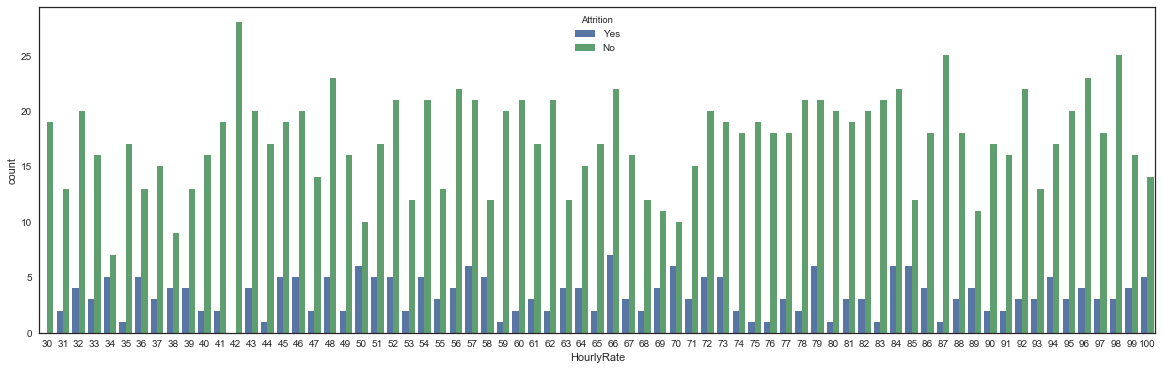

In [31]:
plt.figure(figsize=(20, 6))
sns.countplot(data = dataset, x = "HourlyRate", hue = "Attrition")

In [32]:
dataset.head().T

0                       1  \
Age                                    41                      49   
Attrition                             Yes                      No   
BusinessTravel              Travel_Rarely       Travel_Frequently   
DailyRate                            1102                     279   
Department                          Sales  Research & Development   
DistanceFromHome                        1                       8   
Education                               2                       1   
EducationField              Life Sciences           Life Sciences   
EnvironmentSatisfaction            Medium                    High   
Gender                             Female                    Male   
HourlyRate                             94                      61   
JobInvolvement                       High                  Medium   
JobLevel                                2                       2   
JobRole                   Sales Executive      Research Scientist   
JobSatisfaction                 Very High                  Medium   
MaritalStatus                      Single                 Married   
MonthlyIncome                        5993                    5130   
MonthlyRate                         19479                   24907   
NumCompaniesWorked                      8                       1   
OverTime                              Yes                      No   
PercentSalaryHike                      11                      23   
PerformanceRating               Excellent             Outstanding   
RelationshipSatisfaction              Low               Very High   
StockOptionLevel                        0                       1   
TotalWorkingYears                       8                      10   
TrainingTimesLastYear                   0                       3   
WorkLifeBalance                       Bad                  Better   
YearsAtCompany                          6                      10   
YearsInCurrentRole                      4                       7   
YearsSinceLastPromotion                 0                       1   
YearsWithCurrManager                    5                       7   

                                               2                       3  \
Age                                           37                      33   
Attrition                                    Yes                      No   
BusinessTravel                     Travel_Rarely       Travel_Frequently   
DailyRate                                   1373                    1392   
Department                Research & Development  Research & Development   
DistanceFromHome                               2                       3   
Education                                      2                       4   
EducationField                             Other           Life Sciences   
EnvironmentSatisfaction                Very High               Very High   
Gender                                      Male                  Female   
HourlyRate                                    92                      56   
JobInvolvement                            Medium                    High   
JobLevel                                       1                       1   
JobRole                    Laboratory Technician      Research Scientist   
JobSatisfaction                             High                    High   
MaritalStatus                             Single                 Married   
MonthlyIncome                               2090                    2909   
MonthlyRate                                 2396                   23159   
NumCompaniesWorked                             6                       1   
OverTime                                     Yes                     Yes   
PercentSalaryHike                             15                      11   
PerformanceRating                      Excellent               Excellent   
RelationshipSatisfaction                  Medium                    High   
StockOp

## Business Travel

In [33]:
dataset.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

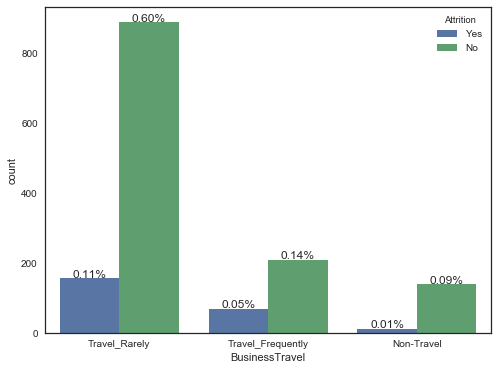

In [34]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = dataset, x = "BusinessTravel", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )

In [35]:
travel_map = {"Non-Travel": 0, "Travel_Frequently": 1, "Travel_Rarely":2}
dataset["BusinessTravel"] = dataset["BusinessTravel"].map(travel_map)

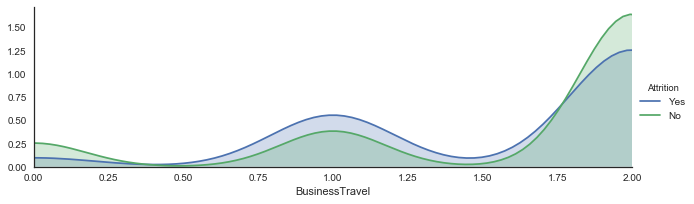

In [36]:
facet = sns.FacetGrid(dataset, hue = "Attrition", aspect = 3)
facet.map(sns.kdeplot,"BusinessTravel",shade= True)
facet.set(xlim=(0, dataset["BusinessTravel"].max()))
facet.add_legend()

## Department Analysis

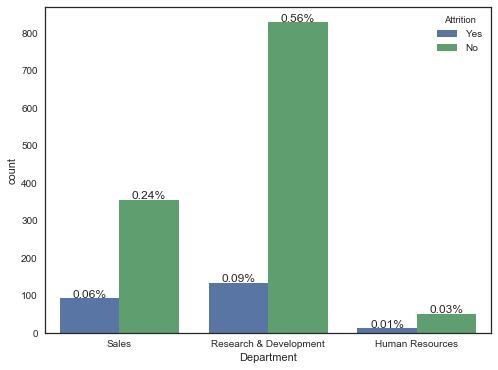

In [37]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = dataset, x = "Department", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )

>__`Sales` Department Employees are highly risky for  attrition__.

## JobRole Analysis

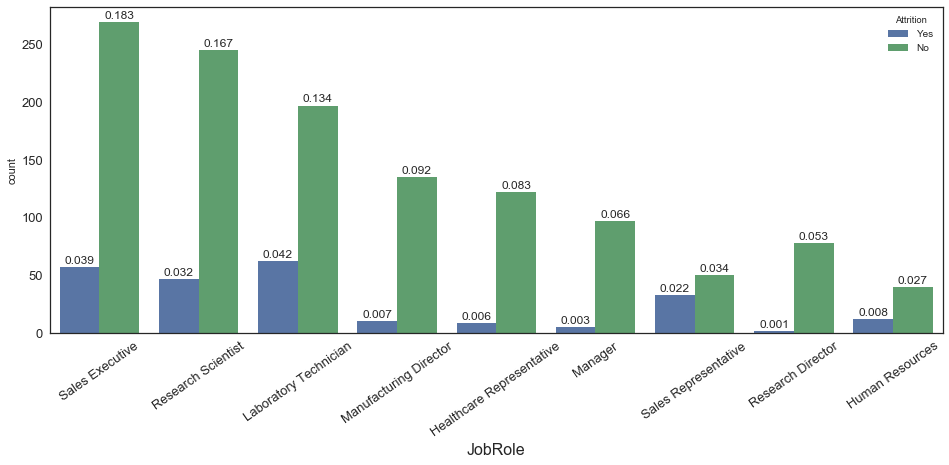

In [38]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(data = dataset, x = "JobRole", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.3f}".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )
plt.xticks(fontsize=13, rotation=35)
plt.yticks(fontsize=13)
plt.xlabel("JobRole", fontsize=16)
plt.show()

__`Sales Representative` has the highest Attrition rate__.

## Education Field Analysis

In [39]:
dataset["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

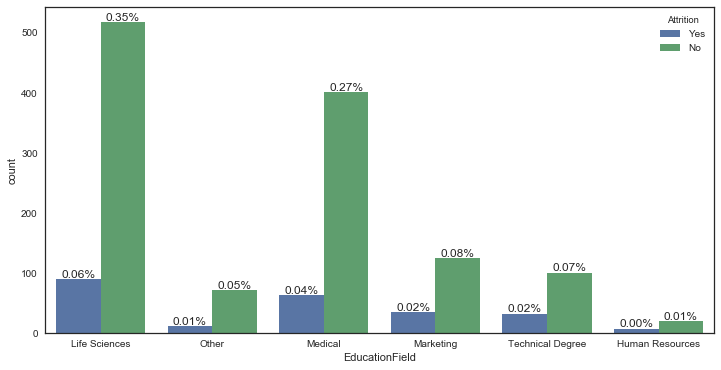

In [40]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = dataset, x = "EducationField", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )

In [41]:
educational_field_map = {
    "Life Sciences" : 0, 
    "Medical":1,
    "Marketing":2,
    "Technical Degree":3,
    "Human Resources":4,
    "Other":5
}

dataset["EducationField"] = dataset["EducationField"].map(educational_field_map)

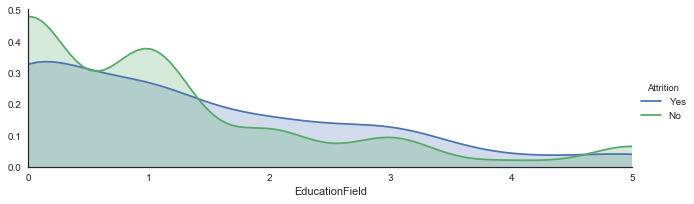

In [42]:
facet = sns.FacetGrid(dataset, hue = "Attrition", aspect = 3)
facet.map(sns.kdeplot,"EducationField",shade= True)
facet.set(xlim=(0, dataset["EducationField"].max()))
facet.add_legend()

>__`Marketing` and `Technical Degree` background Employees are more likely to conduct attrition__.

## EnvironmentSatisfaction

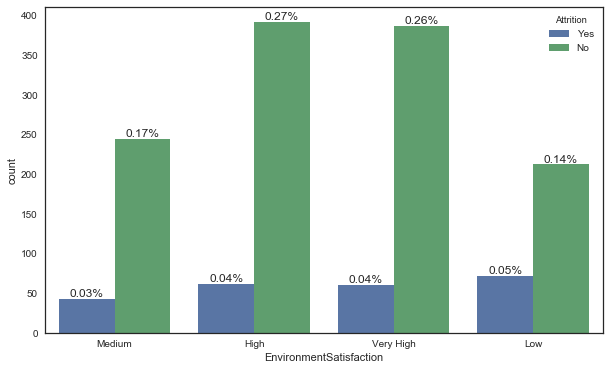

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data = dataset, x = "EnvironmentSatisfaction", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )

>__Employee with `Low` and `Medium` EnvironmentSatisfaction are tends to be conduct Attrition__

## Job Level 

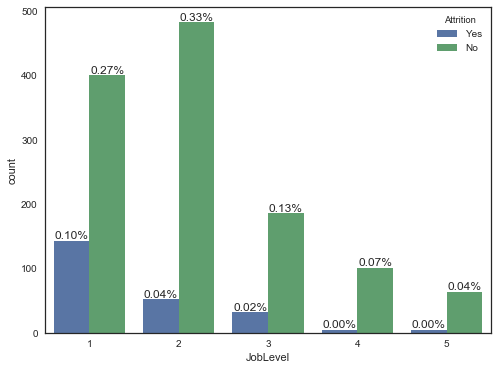

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = dataset, x = "JobLevel", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )

> __`Entry` Level Employees are tends to be conduct Attrition__.

## JobSatisfaction Analysis

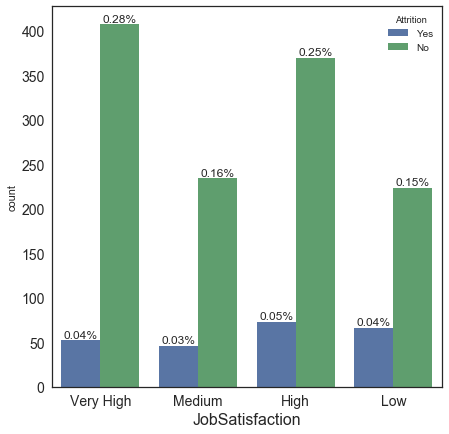

In [45]:
plt.figure(figsize=(7, 7))
ax = sns.countplot(data = dataset, x = "JobSatisfaction", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("JobSatisfaction", fontsize=16)
plt.show()

## MonthlyIncome Analysis

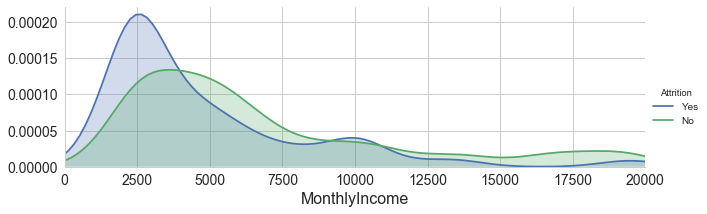

In [46]:
sns.set(style="whitegrid")
facet = sns.FacetGrid(dataset, hue = "Attrition", aspect = 3)
facet.map(sns.kdeplot,"MonthlyIncome",shade= True)
facet.set(xlim=(0, dataset["MonthlyIncome"].max()))
facet.add_legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("MonthlyIncome", fontsize=16)
plt.show()

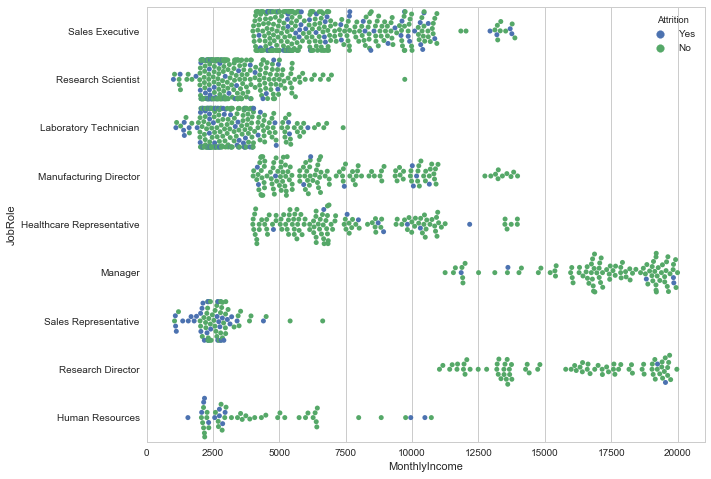

In [47]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x = 'MonthlyIncome',y = "JobRole", hue="Attrition", data = dataset)

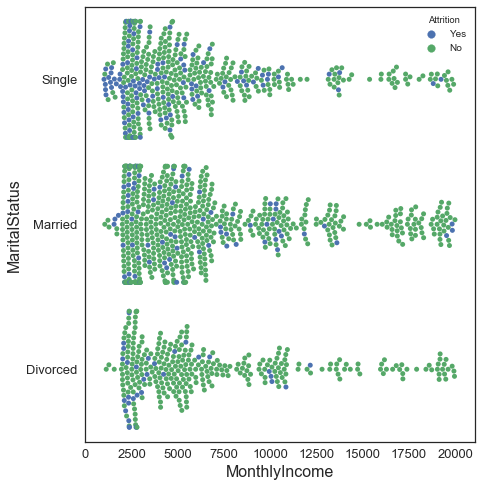

In [48]:
sns.set(style="white")
plt.figure(figsize=(7, 8))
sns.swarmplot(x = 'MonthlyIncome',y = "MaritalStatus", hue="Attrition", data = dataset)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("MonthlyIncome", fontsize=16)
plt.ylabel("MaritalStatus", fontsize=16)
plt.show()

>__`Single` Employee in `Sales Representative` Department are more often conduct Attrition.__

## MonthlyRate Analysis

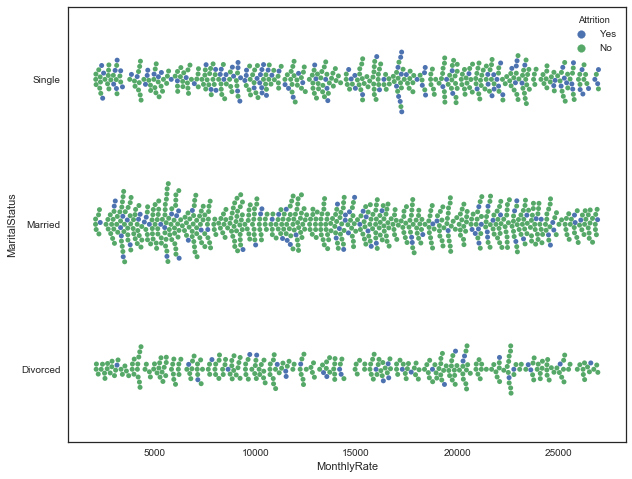

In [49]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x = 'MonthlyRate',y = "MaritalStatus", hue="Attrition", data = dataset)

## NumCompaniesWorked Analysis

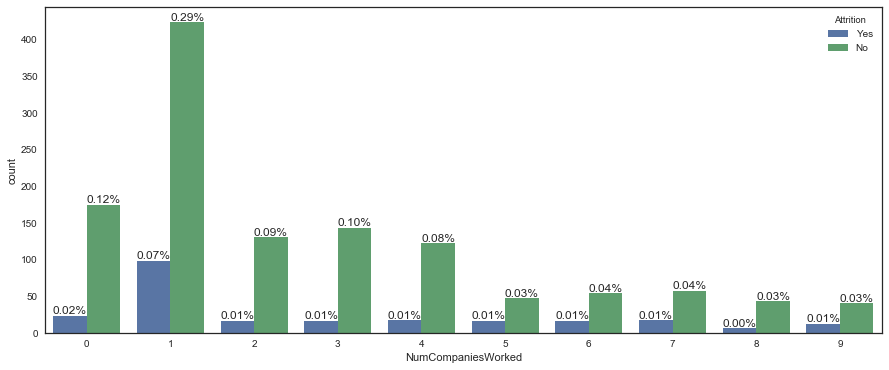

In [50]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data = dataset, x = "NumCompaniesWorked", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )

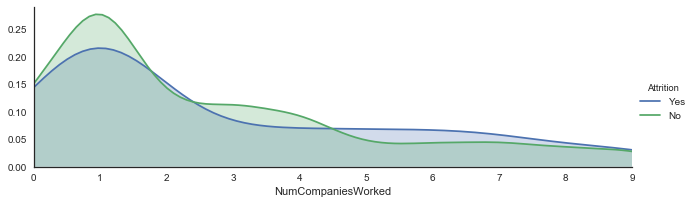

In [51]:
facet = sns.FacetGrid(dataset, hue = "Attrition", aspect = 3)
facet.map(sns.kdeplot,"NumCompaniesWorked",shade= True)
facet.set(xlim=(0, dataset["NumCompaniesWorked"].max()))
facet.add_legend()

## Overtime Analysis

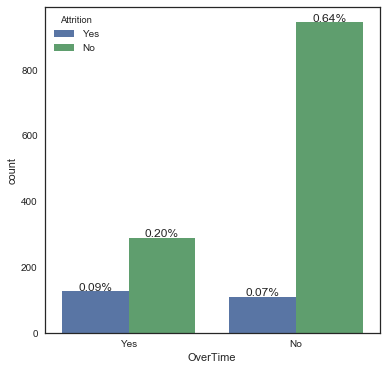

In [52]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(data = dataset, x = "OverTime", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )

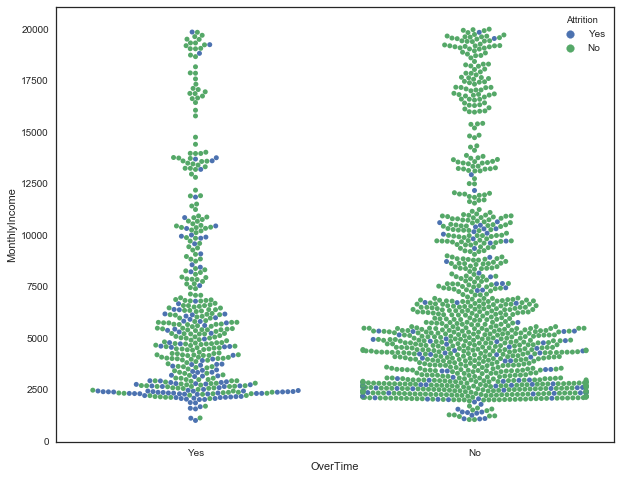

In [53]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x = "OverTime",y = "MonthlyIncome", hue="Attrition", data = dataset)

Married     186
Single      131
Divorced     99
Name: MaritalStatus, dtype: int64


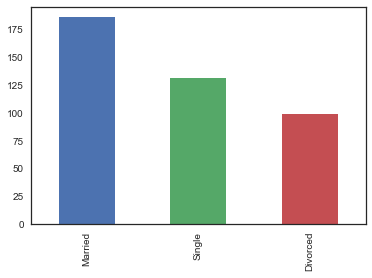

In [54]:
print(dataset[(dataset["OverTime"]=="Yes")]["MaritalStatus"].value_counts())
dataset[(dataset["OverTime"]=="Yes")]["MaritalStatus"].value_counts().plot.bar()

>__After analyzing the above plot we can say that__
* __Employees that  are work overtime are tends to be conduct Attrition__
* __Employees work overtime due to lower `MonthlyIncome`.__
* __Employees with lower `MonthlyIncome` working overtime more than Employees with higher `MonthlyIncome`. __
* __`Married` Employees are tends to be work overtime__.

## PercentSalaryHike Analysis

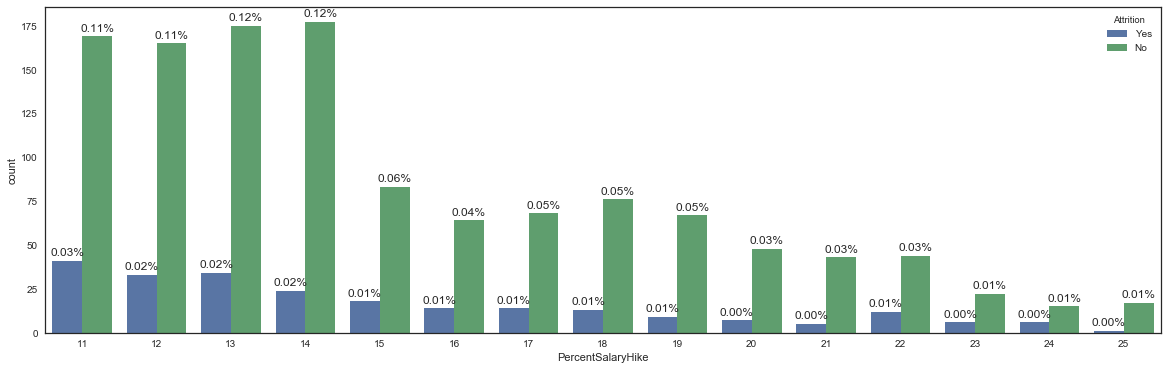

In [55]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(data = dataset, x = "PercentSalaryHike", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )

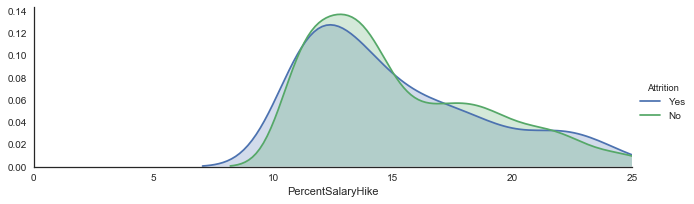

In [56]:
facet = sns.FacetGrid(dataset, hue = "Attrition", aspect = 3)
facet.map(sns.kdeplot,"PercentSalaryHike",shade= True)
facet.set(xlim=(0, dataset["PercentSalaryHike"].max()))
facet.add_legend()

## PerformanceRating Analysis

Excellent      1244
Outstanding     226
Name: PerformanceRating, dtype: int64


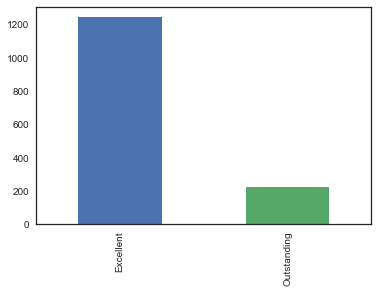

In [57]:
print(dataset["PerformanceRating"].value_counts())
dataset["PerformanceRating"].value_counts().plot.bar()

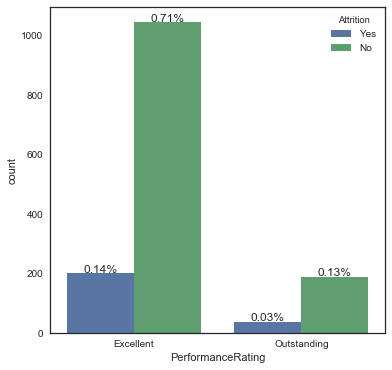

In [58]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(data = dataset, x = "PerformanceRating", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )

## RelationshipSatisfaction Analysis

High         459
Very High    432
Medium       303
Low          276
Name: RelationshipSatisfaction, dtype: int64


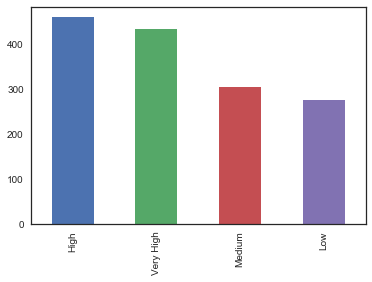

In [59]:
print(dataset["RelationshipSatisfaction"].value_counts())
dataset["RelationshipSatisfaction"].value_counts().plot.bar()

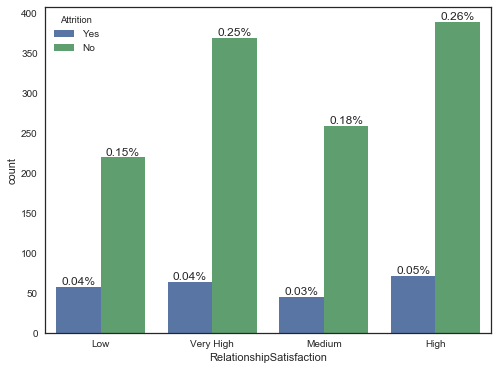

In [60]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = dataset, x = "RelationshipSatisfaction", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )

In [61]:
# RelationshipSatisfaction
dataset.loc[dataset["RelationshipSatisfaction"] == "Low", "RelationshipSatisfaction"] = 1
dataset.loc[dataset["RelationshipSatisfaction"] == "Medium", "RelationshipSatisfaction"] = 2
dataset.loc[dataset["RelationshipSatisfaction"] == "High", "RelationshipSatisfaction"] = 3
dataset.loc[dataset["RelationshipSatisfaction"] == "Very High", "RelationshipSatisfaction"] = 4

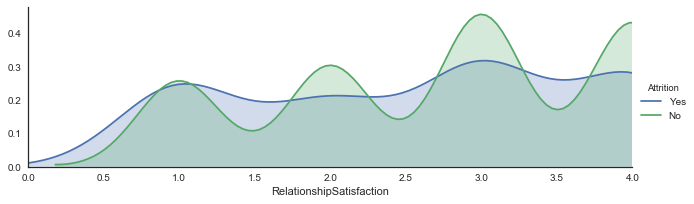

In [62]:
facet = sns.FacetGrid(dataset, hue = "Attrition", aspect = 3)
facet.map(sns.kdeplot,"RelationshipSatisfaction",shade= True)
facet.set(xlim=(0, dataset["RelationshipSatisfaction"].max()))
facet.add_legend()

>__Lower `RelationSatisfaction` with Employees brings higher attrition__

## StockOptionLevel Analysis

In [63]:
dataset["StockOptionLevel"].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

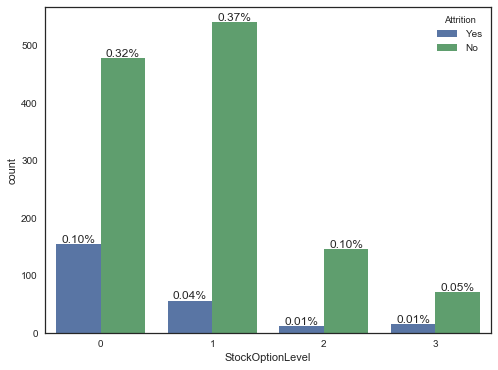

In [64]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = dataset, x = "StockOptionLevel", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )

## TotalWorkingYears Analysis

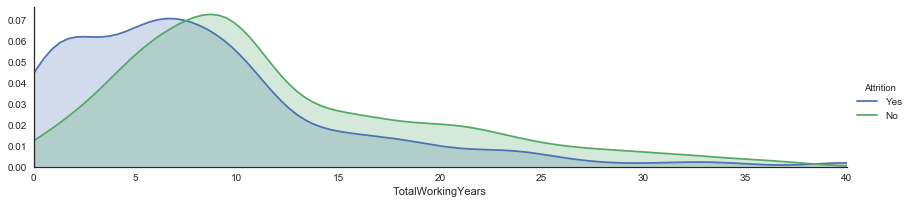

In [65]:
facet = sns.FacetGrid(dataset, hue = "Attrition", aspect = 4)
facet.map(sns.kdeplot,"TotalWorkingYears",shade= True)
facet.set(xlim=(0, dataset["TotalWorkingYears"].max()))
facet.add_legend()

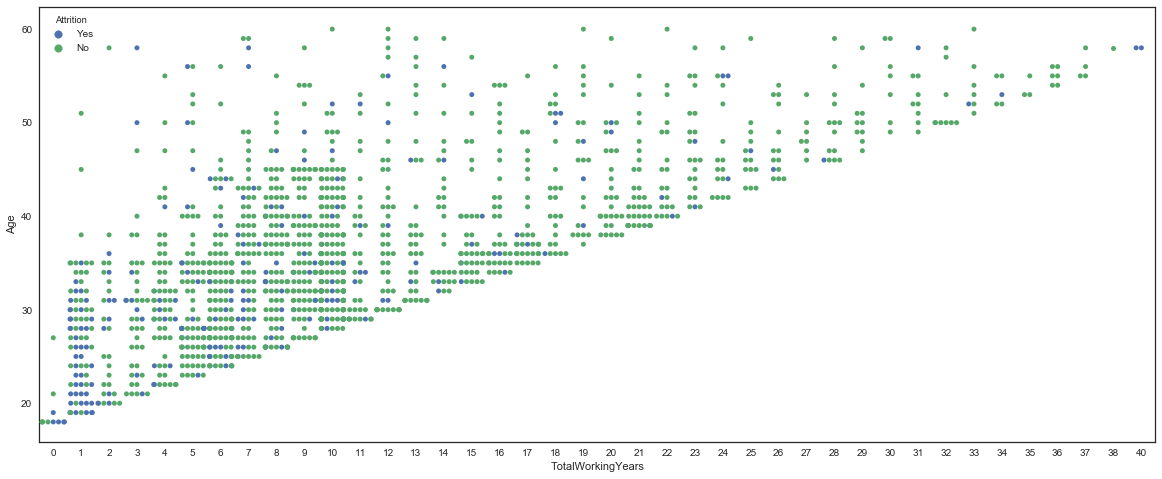

In [66]:
plt.figure(figsize=(20, 8))
sns.swarmplot(x = "TotalWorkingYears",y = "Age", hue="Attrition", data = dataset)

>__`1` years working employees are tends to be conduct attrition.__

## TrainingTimesLastYear Analysis

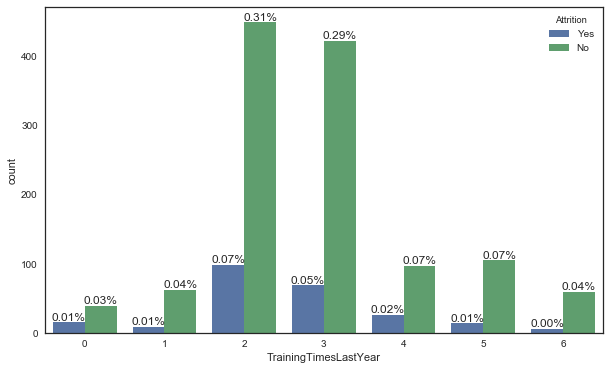

In [67]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data = dataset, x = "TrainingTimesLastYear", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )

## WorkLifeBalance Analysis

In [68]:
dataset["WorkLifeBalance"].value_counts()

Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance, dtype: int64

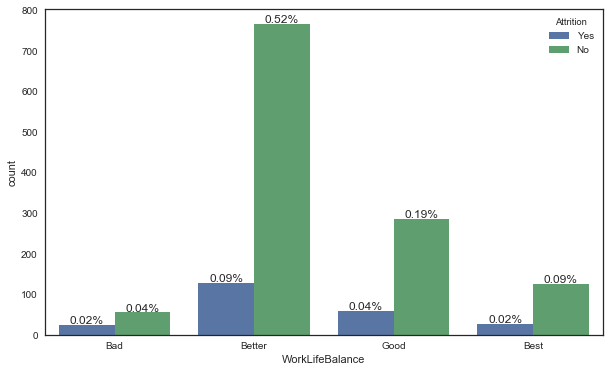

In [69]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data = dataset, x = "WorkLifeBalance", hue = "Attrition")

for p in ax.patches:
        height = p.get_height()
        ax.text(
                p.get_x() + p.get_width()/2.,
                height + 3,
                "{:1.2f}%".format(height/len(dataset),0),
                ha = "center", rotation = 0
               )

>__`Bad` WorkLifeBalance Employee are tends to be more Conducting Attrition__.

## YearsAtCompany Analysis

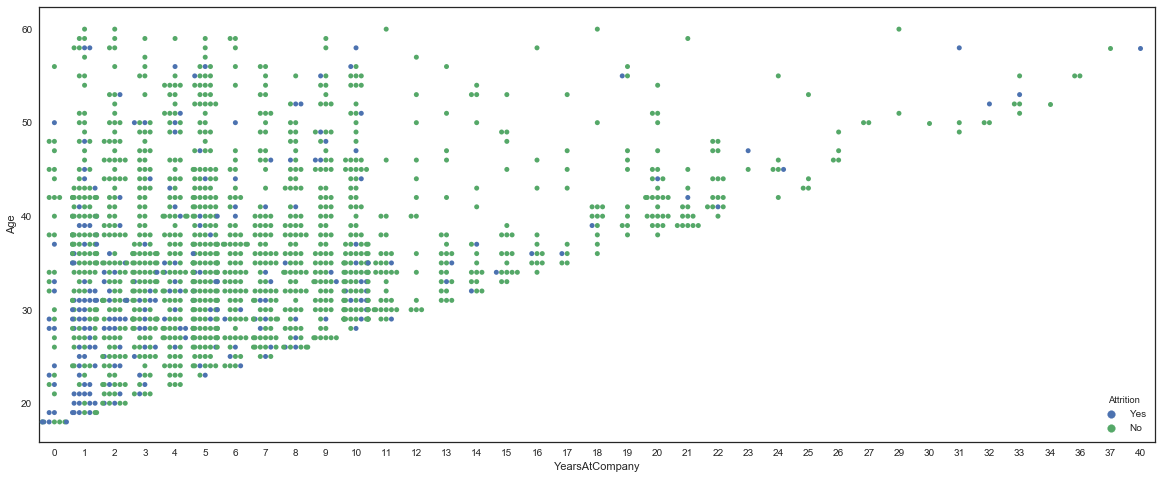

In [70]:
plt.figure(figsize=(20, 8))
sns.swarmplot(x = "YearsAtCompany",y = "Age", hue="Attrition", data = dataset)

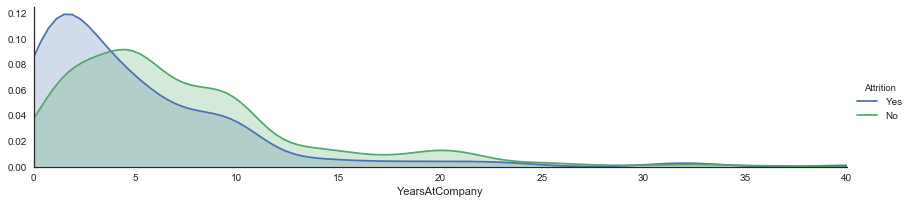

In [71]:
facet = sns.FacetGrid(dataset, hue = "Attrition", aspect = 4)
facet.map(sns.kdeplot,"YearsAtCompany",shade= True)
facet.set(xlim=(0, dataset["YearsAtCompany"].max()))
facet.add_legend()

In [72]:
dataset["YearsAtCompany"].corr(dataset["TotalWorkingYears"])

0.6281331552682461

## YearsInCurrentRole Analysis

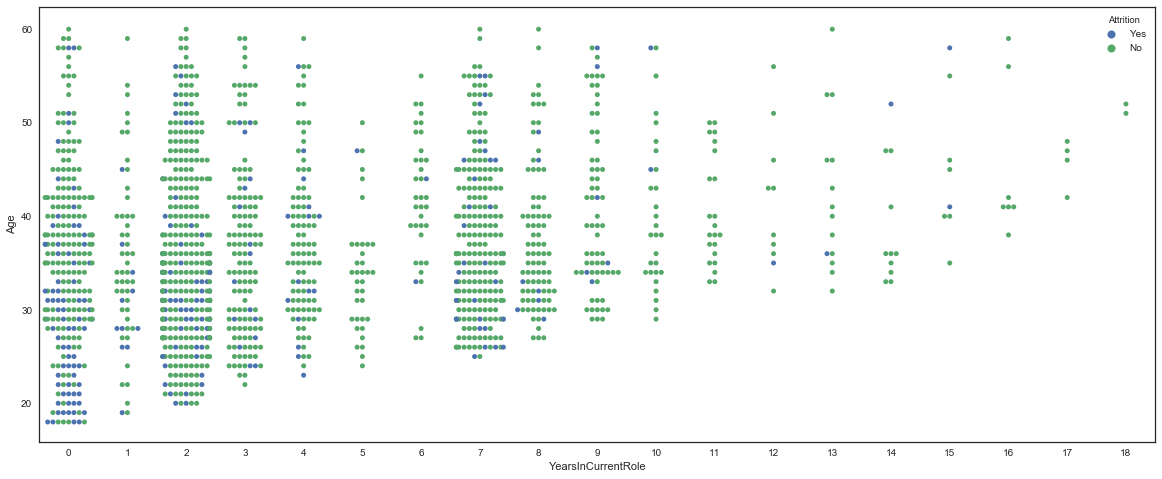

In [73]:
plt.figure(figsize=(20, 8))
sns.swarmplot(x = "YearsInCurrentRole",y = "Age", hue="Attrition", data = dataset)

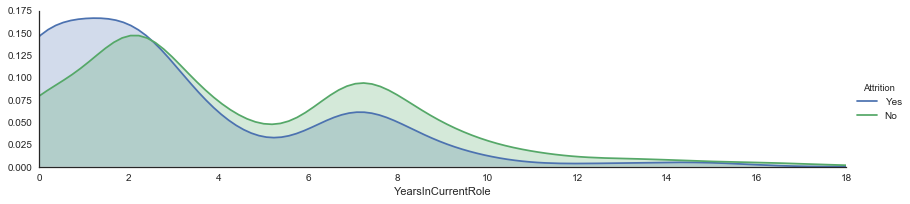

In [74]:
facet = sns.FacetGrid(dataset, hue = "Attrition", aspect = 4)
facet.map(sns.kdeplot,"YearsInCurrentRole",shade= True)
facet.set(xlim=(0, dataset["YearsInCurrentRole"].max()))
facet.add_legend()

In [75]:
dataset[(dataset["YearsInCurrentRole"]>10) & (dataset["Attrition"]=="Yes")]

Age Attrition  BusinessTravel  DailyRate              Department  \
45     41       Yes               2       1360  Research & Development   
595    58       Yes               2        286  Research & Development   
749    52       Yes               2        266                   Sales   
752    36       Yes               2        885  Research & Development   
1162   35       Yes               2        737                   Sales   

      DistanceFromHome  Education  EducationField EnvironmentSatisfaction  \
45                  12          3               3                  Medium   
595                  2          4               0               Very High   
749                  2          1               2                     Low   
752                 16          4               0                    High   
1162                10          3               1               Very High   

      Gender         ...           PerformanceRating RelationshipSatisfaction  \
45    Female         ...                   Excellent                        4   
595     Male         ...                   Excellent                        4   
749   Female         ...                   Excellent                        4   
752   Female         ...                   Excellent                        3   
1162    Male         ...                   Excellent                        3   

      StockOptionLevel TotalWorkingYears TrainingTimesLastYear  \
45                   0                23                     0   
595                  0                40                     2   
749                  1                33                     3   
752                  0                18                     1   
1162                 0                15                     3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
45            Better              22                  15   
595           Better              31                  15   
749           Better              32                  14   
752           Better              17                  13   
1162          Better              13                  12   

      YearsSinceLastPromotion YearsWithCurrManager  
45                         15                    8  
595                        13                    8  
749                         6                    9  
752                        15                   14  
1162                        6                    0  

[5 rows x 31 columns]

## YearsSinceLastPromotion Analysis

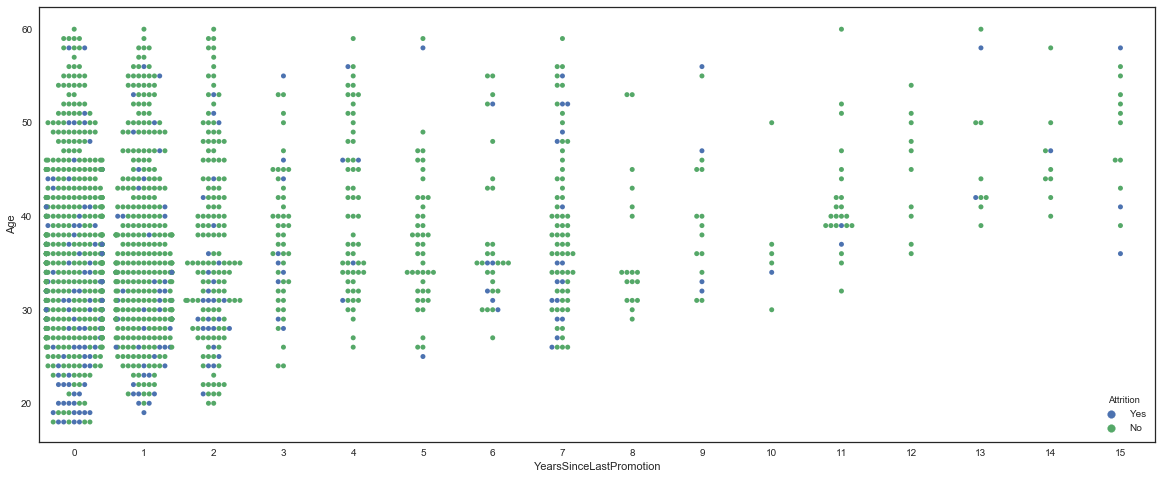

In [76]:
plt.figure(figsize=(20, 8))
sns.swarmplot(x = "YearsSinceLastPromotion",y = "Age", hue="Attrition", data = dataset)

>__Frequently Promoted Employees are tends to be conduct Attrition__.

## YearsWithCurrManager Analysis

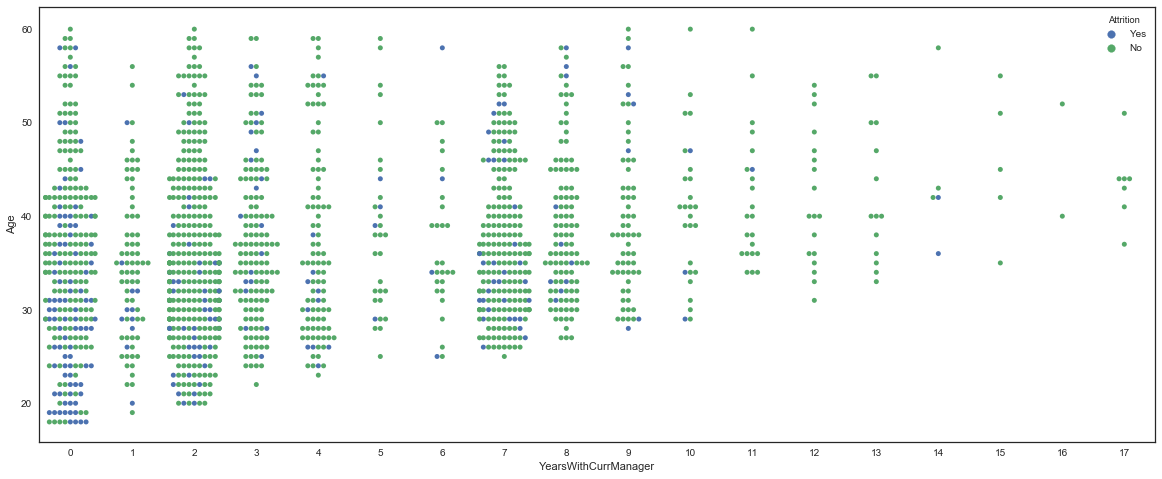

In [77]:
plt.figure(figsize=(20, 8))
sns.swarmplot(x = "YearsWithCurrManager",y = "Age", hue="Attrition", data = dataset)

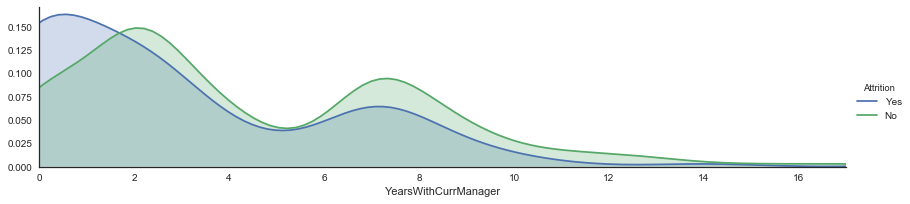

In [78]:
facet = sns.FacetGrid(dataset, hue = "Attrition", aspect = 4)
facet.map(sns.kdeplot,"YearsWithCurrManager",shade= True)
facet.set(xlim=(0, dataset["YearsWithCurrManager"].max()))
facet.add_legend()

In [79]:
dataset.head()

Age Attrition  BusinessTravel  DailyRate              Department  \
0   41       Yes               2       1102                   Sales   
1   49        No               1        279  Research & Development   
2   37       Yes               2       1373  Research & Development   
3   33        No               1       1392  Research & Development   
4   27        No               2        591  Research & Development   

   DistanceFromHome  Education  EducationField EnvironmentSatisfaction  \
0                 1          2               0                  Medium   
1                 8          1               0                    High   
2                 2          2               5               Very High   
3                 3          4               0               Very High   
4                 2          1               1                     Low   

   Gender         ...           PerformanceRating RelationshipSatisfaction  \
0  Female         ...                   Excellent                        1   
1    Male         ...                 Outstanding                        4   
2    Male         ...                   Excellent                        2   
3  Female         ...                   Excellent                        3   
4    Male         ...                   Excellent                        4   

   StockOptionLevel TotalWorkingYears TrainingTimesLastYear WorkLifeBalance  \
0                 0                 8                     0             Bad   
1                 1                10                     3          Better   
2                 0                 7                     3          Better   
3                 0                 8                     3          Better   
4                 1                 6                     3          Better   

   YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                   4                        0   
1              10                   7                        1   
2               0                   0                        0   
3               8                   7                        3   
4               2                   2                        2   

  YearsWithCurrManager  
0                    5  
1                    7  
2                    0  
3                    0  
4                    2  

[5 rows x 31 columns]

In [80]:
# Attrition
dataset.loc[dataset["Attrition"] == "Yes", "Attrition"] = 1
dataset.loc[dataset["Attrition"] == "No", "Attrition"] = 0

# Department
dataset.loc[dataset["Department"] == "Sales", "Department"] = 0
dataset.loc[dataset["Department"] == "Research & Development", "Department"] = 1
dataset.loc[dataset["Department"] == "Human Resources", "Department"] = 2

# EnvironmentSatisfaction
dataset.loc[dataset["EnvironmentSatisfaction"] == "Low", "EnvironmentSatisfaction"] = 1
dataset.loc[dataset["EnvironmentSatisfaction"] == "Medium", "EnvironmentSatisfaction"] = 2
dataset.loc[dataset["EnvironmentSatisfaction"] == "High", "EnvironmentSatisfaction"] = 3
dataset.loc[dataset["EnvironmentSatisfaction"] == "Very High", "EnvironmentSatisfaction"] = 4

# Gender
dataset.loc[dataset["Gender"] == "Female", "Gender"] = 0
dataset.loc[dataset["Gender"] == "Male", "Gender"] = 1

# JobInvolvement
dataset.loc[dataset["JobInvolvement"] == "Low", "JobInvolvement"] = 1
dataset.loc[dataset["JobInvolvement"] == "Medium", "JobInvolvement"] = 2
dataset.loc[dataset["JobInvolvement"] == "High", "JobInvolvement"] = 3
dataset.loc[dataset["JobInvolvement"] == "Very High", "JobInvolvement"] = 4

# JobSatisfaction
dataset.loc[dataset["JobSatisfaction"] == "Low", "JobSatisfaction"] = 1
dataset.loc[dataset["JobSatisfaction"] == "Medium", "JobSatisfaction"] = 2
dataset.loc[dataset["JobSatisfaction"] == "High", "JobSatisfaction"] = 3
dataset.loc[dataset["JobSatisfaction"] == "Very High", "JobSatisfaction"] = 4

# WorkLifeBalance
dataset.loc[dataset["WorkLifeBalance"] == "Bad", "WorkLifeBalance"] = 1
dataset.loc[dataset["WorkLifeBalance"] == "Good", "WorkLifeBalance"] = 2
dataset.loc[dataset["WorkLifeBalance"] == "Better", "WorkLifeBalance"] = 3
dataset.loc[dataset["WorkLifeBalance"] == "Best", "WorkLifeBalance"] = 4

# OverTime
dataset.loc[dataset["OverTime"] == "Yes", "OverTime"] = 1
dataset.loc[dataset["OverTime"] == "No", "OverTime"] = 0

In [81]:
encoder = LabelEncoder()
dataset["JobRole"] = encoder.fit_transform(dataset["JobRole"])
dataset["MaritalStatus"] = encoder.fit_transform(dataset["MaritalStatus"])
dataset["PerformanceRating"] = encoder.fit_transform(dataset["PerformanceRating"])

In [82]:
dataset.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           0                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  \
0          2               0                        2       0   
1          1               0                        3       1   
2          2               5                        4       1   
3          4               0                        4       0   
4          1               1                        1       1   

           ...           PerformanceRating  RelationshipSatisfaction  \
0          ...                           0                         1   
1          ...                           1                         4   
2          ...                           0                         2   
3          ...                           0                         3   
4          ...                           0                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 31 columns]

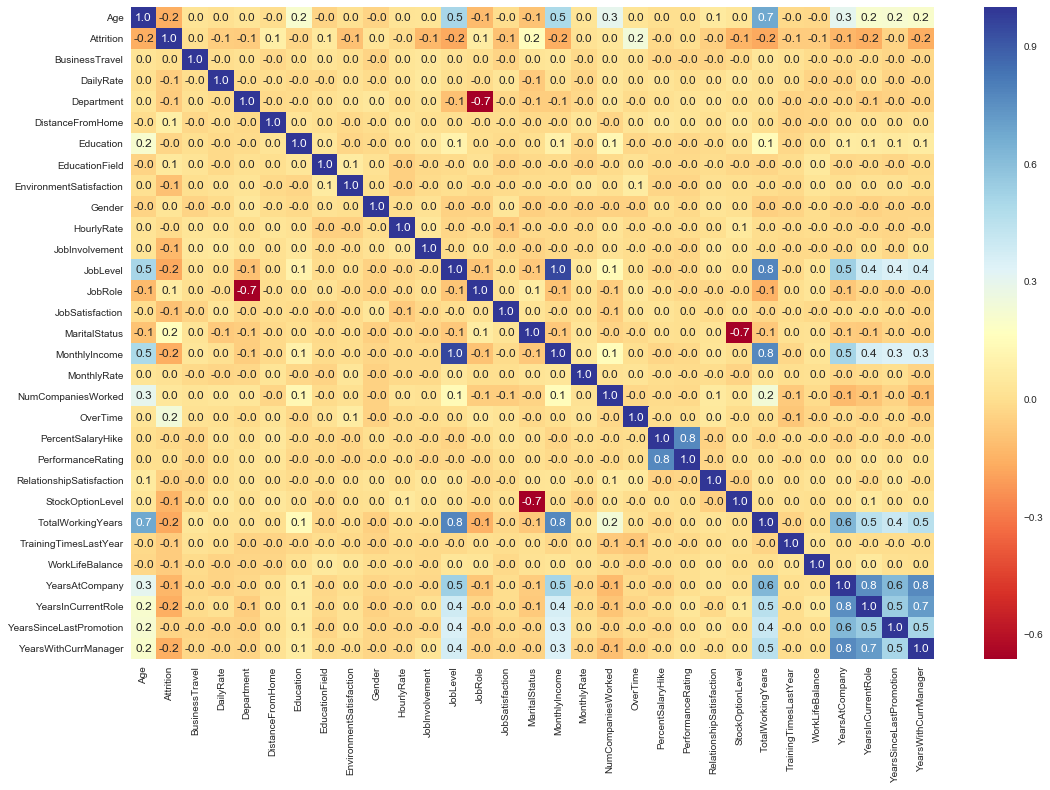

In [83]:
plt.figure(figsize=(18, 12))
sns.heatmap(dataset.corr(), cmap="RdYlBu", annot=True, fmt=".1f")

In [84]:
dataset.drop(["JobLevel", "YearsAtCompany", "PercentSalaryHike", "TotalWorkingYears"], axis=1, inplace=True)

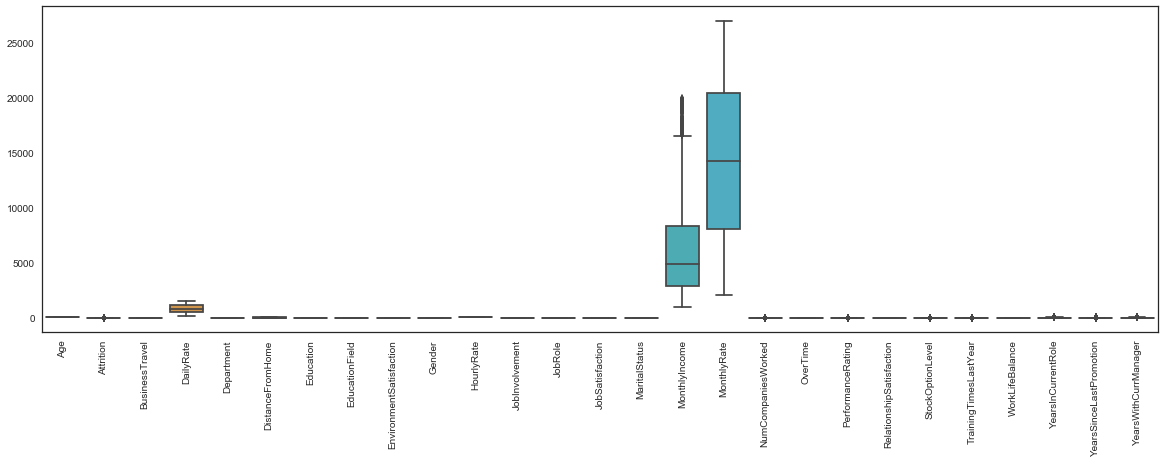

In [85]:
plt.figure(figsize=(20, 6))
sns.boxplot(data = dataset)
plt.xticks(rotation=90)
plt.show()

In [86]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = dataset.drop("Attrition", axis=1)
scaled_feature = scale.fit_transform(X)

In [87]:
scaled_df = pd.DataFrame(data = scaled_feature, columns = X.columns)

In [88]:
scaled_df.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.446350        0.590048   0.742527   -1.401512         -1.010909   
1  1.322365       -0.913194  -1.297775    0.493817         -0.147150   
2  0.008343        0.590048   1.414363    0.493817         -0.887515   
3 -0.429664       -0.913194   1.461466    0.493817         -0.764121   
4 -1.086676        0.590048  -0.524295    0.493817         -0.887515   

   Education  EducationField  EnvironmentSatisfaction    Gender  HourlyRate  \
0  -0.891688       -0.833994                -0.660531 -1.224745    1.383138   
1  -1.868426       -0.833994                 0.254625  0.816497   -0.240677   
2  -0.891688        2.780306                 1.169781  0.816497    1.284725   
3   1.061787       -0.833994                 1.169781 -1.224745   -0.486709   
4  -1.868426       -0.111134                -1.575686  0.816497   -1.274014   

           ...           NumCompaniesWorked  OverTime  PerformanceRating  \
0          ...                     2.125136  1.591746          -0.426230   
1          ...                    -0.678049 -0.628241           2.346151   
2          ...                     1.324226  1.591746          -0.426230   
3          ...                    -0.678049  1.591746          -0.426230   
4          ...                     2.525591 -0.628241          -0.426230   

   RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                 -1.584178         -0.932014              -2.171982   
1                  1.191438          0.241988               0.155707   
2                 -0.658973         -0.932014               0.155707   
3                  0.266233         -0.932014               0.155707   
4                  1.191438          0.241988               0.155707   

   WorkLifeBalance  YearsInCurrentRole  YearsSinceLastPromotion  \
0        -2.493820           -0.063296                -0.679146   
1         0.338096            0.764998                -0.368715   
2         0.338096           -1.167687                -0.679146   
3         0.338096            0.764998                 0.252146   
4         0.338096           -0.615492                -0.058285   

   YearsWithCurrManager  
0              0.245834  
1              0.806541  
2             -1.155935  
3             -1.155935  
4             -0.595227  

[5 rows x 26 columns]

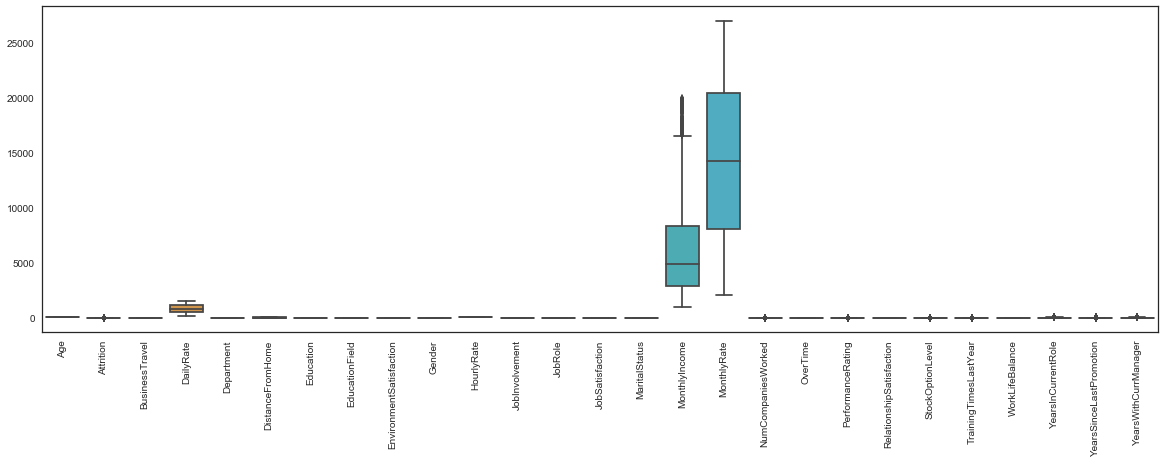

In [89]:
plt.figure(figsize=(20, 6))
sns.boxplot(data = dataset)
plt.xticks(rotation=90)
plt.show()

In [90]:
# detecting Outlier
# Inter Quartile Range is the distance between the 3rd Quartile and the first Qartile

minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

In [91]:
def remove_outlier(feature):
    first_q = np.percentile(scaled_df[feature], 25)
    third_q = np.percentile(scaled_df[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    
    mean = scaled_df[feature].median()
    
    scaled_df.loc[scaled_df[feature] < minimum, feature] = mean
    scaled_df.loc[scaled_df[feature] > maximum, feature] = mean

In [92]:
for i in range(len(scaled_df.columns)):
    if(detect_outlier(scaled_df[scaled_df.columns[i]])):
        print(scaled_df.columns[i], "Contains Outlier")

EducationField Contains Outlier
MonthlyIncome Contains Outlier
NumCompaniesWorked Contains Outlier
PerformanceRating Contains Outlier
StockOptionLevel Contains Outlier
TrainingTimesLastYear Contains Outlier
YearsInCurrentRole Contains Outlier
YearsSinceLastPromotion Contains Outlier
YearsWithCurrManager Contains Outlier


In [93]:
for i in range(7):
    for i in range(len(scaled_df.columns)):
        remove_outlier(scaled_df.columns[i])

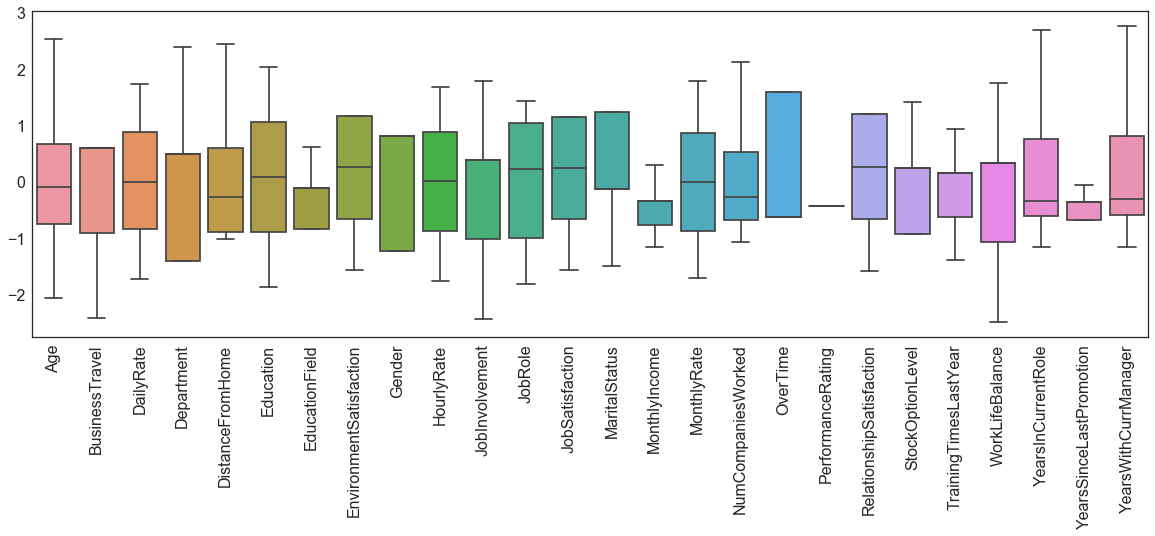

In [94]:
plt.figure(figsize=(20, 6))
sns.boxplot(data = scaled_df)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [95]:
X = scaled_df
y = dataset["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [96]:
clf_lr = LogisticRegression()
pred = clf_lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(pred, y_test))

clf_svc = SVC(probability=True, C=10, kernel="linear")
pred = clf_svc.fit(X_train, y_train).predict(X_test)
print(accuracy_score(pred, y_test))

clf_rf = RandomForestClassifier(n_estimators=200, random_state=1)
pred = clf_rf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(pred, y_test))

clf_xgb = XGBClassifier(n_estimators=220, random_state=1)
pred = clf_xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(pred, y_test))

0.8401360544217688
0.8333333333333334
0.8197278911564626
0.8333333333333334


C:\Users\DIU\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [97]:
smote = SMOTE(random_state=1)
X_res, y_res = smote.fit_sample(X,y)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_res, y_res, test_size = 0.2, random_state = 1)

In [98]:
clf_lr = LogisticRegression(penalty="l1", C = 1)
pred = clf_lr.fit(X_train_a, y_train_a).predict(X_test_a)
print("LR Accuracy: ", accuracy_score(pred, y_test_a))

clf_svc = SVC(probability = True, kernel="linear", gamma=0.2)
pred = clf_svc.fit(X_train_a, y_train_a).predict(X_test_a)
print("SVC Accuracy: ", accuracy_score(pred, y_test_a))

clf_rf = RandomForestClassifier(random_state=1)
pred = clf_rf.fit(X_train_a, y_train_a).predict(X_test_a)
print("RF Accuracy: ", accuracy_score(pred, y_test_a))

clf_xgb = XGBClassifier(random_state=42, learning_rate=0.05, max_depth=10, gamma=0.2)
pred = clf_xgb.fit(X_train_a, y_train_a).predict(X_test_a)
print("XGB Accuracy: ", accuracy_score(pred, y_test_a))

LR Accuracy:  0.7489878542510121
SVC Accuracy:  0.7449392712550608
RF Accuracy:  0.902834008097166
XGB Accuracy:  0.9129554655870445


C:\Users\DIU\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


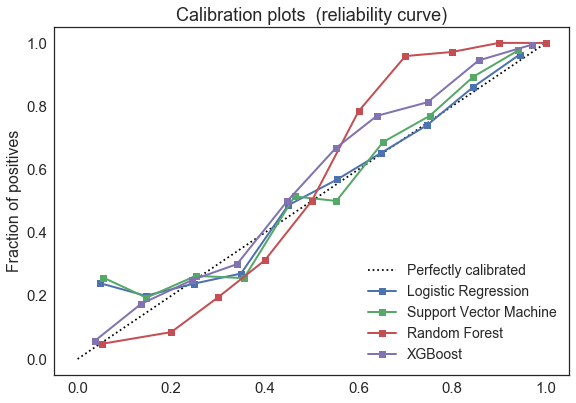

In [99]:
sns.set(style="white")
np.random.seed(0)

plt.figure(figsize=(8, 8))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(clf_lr, 'Logistic Regression'),
                  (clf_svc, 'Support Vector Machine'),
                  (clf_rf, 'Random Forest'),
                  (clf_xgb, 'XGBoost')]:
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test_a)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test_a)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test_a, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name, ), lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right", fontsize=14)
ax1.set_title('Calibration plots  (reliability curve)')

plt.tight_layout()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Fraction of positives", fontsize=16)
plt.title('Calibration plots  (reliability curve)', fontsize=18)
plt.savefig("calibration_plot_optimum.png", format="png", dpi=300)

In [100]:
clf_rf = RandomForestClassifier(random_state=1, n_estimators=20)
pred = clf_rf.fit(X_train_a, y_train_a).predict(X_test_a)
print("RF Accuracy: ", accuracy_score(pred, y_test_a))

pd.DataFrame({
    "Feature Importance": clf_rf.feature_importances_, 
    "Feature Name": X_test.columns.tolist()
}).sort_values("Feature Importance", ascending=False)

RF Accuracy:  0.902834008097166


Feature Importance              Feature Name
17            0.112574                  OverTime
14            0.076483             MonthlyIncome
13            0.065757             MaritalStatus
20            0.059492          StockOptionLevel
7             0.050197   EnvironmentSatisfaction
12            0.048983           JobSatisfaction
23            0.046736        YearsInCurrentRole
0             0.044871                       Age
6             0.040684            EducationField
25            0.040177      YearsWithCurrManager
2             0.036419                 DailyRate
4             0.035512          DistanceFromHome
9             0.034089                HourlyRate
11            0.034015                   JobRole
5             0.033580                 Education
16            0.032828        NumCompaniesWorked
19            0.030384  RelationshipSatisfaction
15            0.030210               MonthlyRate
10            0.025759            JobInvolvement
22            0.023474           WorkLifeBalance
24            0.023448   YearsSinceLastPromotion
21            0.023127     TrainingTimesLastYear
1             0.020821            BusinessTravel
8             0.016670                    Gender
3             0.013710                Department
18            0.000000         PerformanceRating

In [101]:
perm = PermutationImportance(clf_rf, random_state = 1).fit(X_test_a, y_test_a)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [102]:
rf_perm_imp_weight = []
for i in range(len(perm.feature_importances_)):
    rf_perm_imp_weight.append(format(perm.feature_importances_[i], ".6f"))
    
rf_perm = pd.DataFrame({
    "Feature_Name": X_test.columns.tolist(),
    "RF_Perm_Imp_Weight" : rf_perm_imp_weight
}).sort_values("RF_Perm_Imp_Weight", ascending=False)

rf_perm["RF_Perm_Imp_Weight"] = rf_perm["RF_Perm_Imp_Weight"].astype(float)

reduced_feature = rf_perm["Feature_Name"][rf_perm["RF_Perm_Imp_Weight"] > 0.012].values

reduced_df = X[reduced_feature]

In [103]:
X = reduced_df
y = dataset["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

smote = SMOTE(random_state=1)
X_res, y_res = smote.fit_sample(X,y)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_res, y_res, test_size = 0.2, random_state = 1)

clf_lr = LogisticRegression()
pred = clf_lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(pred, y_test))

clf_svc = SVC(probability=True, C=10)
pred = clf_svc.fit(X_train, y_train).predict(X_test)
print(accuracy_score(pred, y_test))

clf_rf = RandomForestClassifier(n_estimators=200, random_state=1)
pred = clf_rf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(pred, y_test))

clf_xgb = XGBClassifier(n_estimators=320, random_state=1, learning_rate=0.05, max_depth=10)
pred = clf_xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(pred, y_test))

clf_lr = LogisticRegression(penalty="l1", C = 1)
pred = clf_lr.fit(X_train_a, y_train_a).predict(X_test_a)
print("LR Accuracy: ", accuracy_score(pred, y_test_a))

clf_svc = SVC(probability = True, kernel="linear", gamma=0.2)
pred = clf_svc.fit(X_train_a, y_train_a).predict(X_test_a)
print("SVC Accuracy: ", accuracy_score(pred, y_test_a))

clf_rf = RandomForestClassifier(random_state=1)
pred = clf_rf.fit(X_train_a, y_train_a).predict(X_test_a)
print("RF Accuracy: ", accuracy_score(pred, y_test_a))


clf_xgb = XGBClassifier(n_estimators=220, random_state=1, learning_rate=0.05, max_depth=10)
pred = clf_xgb.fit(X_train_a, y_train_a).predict(X_test_a)
print("XGB Accuracy: ", accuracy_score(pred, y_test_a))

0.8401360544217688
0.8231292517006803
0.8299319727891157


C:\Users\DIU\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8197278911564626
LR Accuracy:  0.7246963562753036
SVC Accuracy:  0.7165991902834008
RF Accuracy:  0.8623481781376519
XGB Accuracy:  0.8947368421052632


C:\Users\DIU\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


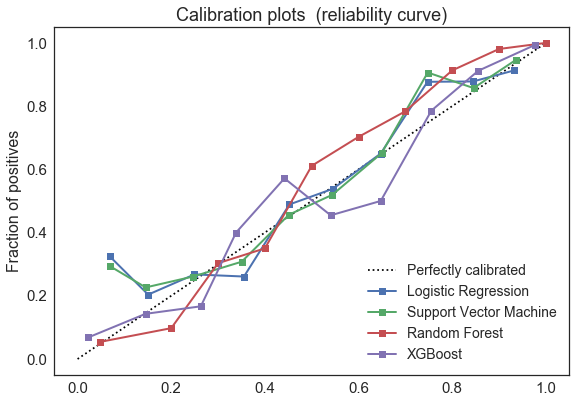

In [104]:
sns.set(style="white")
np.random.seed(0)

plt.figure(figsize=(8, 8))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(clf_lr, 'Logistic Regression'),
                  (clf_svc, 'Support Vector Machine'),
                  (clf_rf, 'Random Forest'),
                  (clf_xgb, 'XGBoost')]:
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test_a)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test_a)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test_a, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name, ), lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right", fontsize=14)
ax1.set_title('Calibration plots  (reliability curve)')

plt.tight_layout()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Fraction of positives", fontsize=16)
plt.title('Calibration plots  (reliability curve)', fontsize=18)
plt.savefig("calibration_plot_reduced.png", format="png", dpi=300)

In [105]:
pca = PCA(n_components=12)

X = scaled_df
y = dataset["Attrition"]

smote = SMOTE(random_state=1)
X_res, y_res = smote.fit_sample(X,y)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_res, y_res, test_size = 0.2, random_state = 1)

X_train_a = pca.fit_transform(X_train_a)
X_test_a = pca.transform(X_test_a)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.09804234, 0.08901663, 0.06297806, 0.06125506, 0.05882036,
       0.05453868, 0.05308378, 0.049748  , 0.04897476, 0.04792005,
       0.04651389, 0.04445912])

In [106]:
clf_lr = LogisticRegression()
pred = clf_lr.fit(X_train_a, y_train_a).predict(X_test_a)
print(accuracy_score(pred, y_test_a))

clf_svc = SVC(probability=True, kernel="linear")
pred = clf_svc.fit(X_train_a, y_train_a).predict(X_test_a)
print(accuracy_score(pred, y_test_a))

clf_rf = RandomForestClassifier(random_state=1)
pred = clf_rf.fit(X_train_a, y_train_a).predict(X_test_a)
print(accuracy_score(pred, y_test_a))

clf_xgb = XGBClassifier(random_state=1, learning_rate=0.05, max_depth=10)
pred = clf_xgb.fit(X_train_a, y_train_a).predict(X_test_a)
print(accuracy_score(pred, y_test_a))

0.7530364372469636
0.7469635627530364
0.8441295546558705
0.8562753036437247


C:\Users\DIU\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


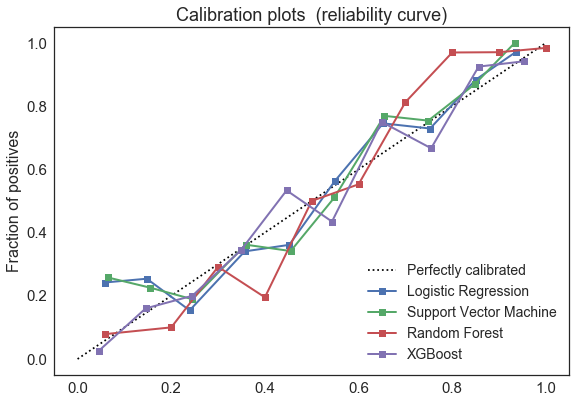

In [107]:
sns.set(style="white")
np.random.seed(0)

plt.figure(figsize=(8, 8))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(clf_lr, 'Logistic Regression'),
                  (clf_svc, 'Support Vector Machine'),
                  (clf_rf, 'Random Forest'),
                  (clf_xgb, 'XGBoost')]:
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test_a)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test_a)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test_a, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name, ), lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right", fontsize=14)
ax1.set_title('Calibration plots  (reliability curve)')

plt.tight_layout()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Fraction of positives", fontsize=16)
plt.title('Calibration plots  (reliability curve)', fontsize=18)
plt.savefig("calibration_plot_pca_n.png", format="png", dpi=300)

In [108]:
pca = PCA(n_components=2)

smote = SMOTE(random_state=1)
X_res, y_res = smote.fit_sample(X,y)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_res, y_res, test_size = 0.2, random_state = 1)

X_train_a = pca.fit_transform(X_train_a)
X_test_a = pca.transform(X_test_a)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.09804219, 0.08901624])

In [109]:
clf_lr = LogisticRegression()
pred = clf_lr.fit(X_train_a, y_train_a).predict(X_test_a)
print(accuracy_score(pred, y_test_a))

clf_svc = SVC(probability=True, kernel="linear")
pred = clf_svc.fit(X_train_a, y_train_a).predict(X_test_a)
print(accuracy_score(pred, y_test_a))

clf_rf = RandomForestClassifier(n_estimators=100, random_state=1)
pred = clf_rf.fit(X_train_a, y_train_a).predict(X_test_a)
print(accuracy_score(pred, y_test_a))

clf_xgb = XGBClassifier(n_estimators=220, random_state=1, learning_rate=0.05, max_depth=10)
pred = clf_xgb.fit(X_train_a, y_train_a).predict(X_test_a)
print(accuracy_score(pred, y_test_a))

0.6842105263157895
0.6781376518218624
0.7044534412955465
0.680161943319838


C:\Users\DIU\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


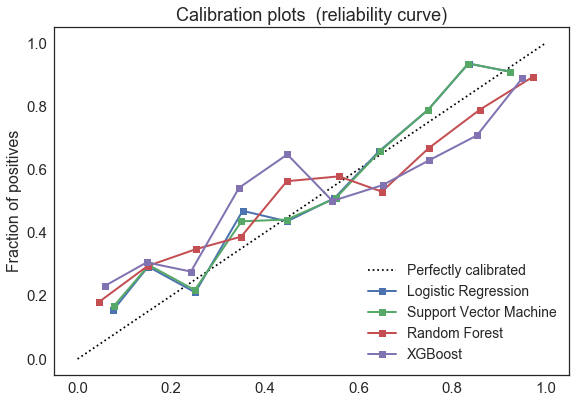

In [110]:
sns.set(style="white")
np.random.seed(0)

plt.figure(figsize=(8, 8))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(clf_lr, 'Logistic Regression'),
                  (clf_svc, 'Support Vector Machine'),
                  (clf_rf, 'Random Forest'),
                  (clf_xgb, 'XGBoost')]:
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test_a)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test_a)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test_a, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name, ), lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right", fontsize=14)
ax1.set_title('Calibration plots  (reliability curve)')

plt.tight_layout()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Fraction of positives", fontsize=16)
plt.title('Calibration plots  (reliability curve)', fontsize=18)
plt.savefig("calibration_plot_pca_2.png", format="png", dpi=300)